In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import kagglehub
import os

path = kagglehub.dataset_download("wardabilal/salary-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 16.6k/16.6k [00:00<00:00, 28.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/wardabilal/salary-prediction-dataset/versions/1


In [ ]:
files = os.listdir(path)
print("File ditemukan:", files)

File ditemukan: ['Salary_Data.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, 'Salary_Data.csv'))
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


pre processing

In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [ ]:
df.isna().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [ ]:
df.dropna(subset=['Salary'],inplace=True)
df.isna().sum()

,0
Age,0
Gender,0
Education Level,1
Job Title,0
Years of Experience,0
Salary,0


In [ ]:
df.dropna(subset=['Education Level'],inplace=True)
df = df[df['Salary'] >= 1000]
df.isna().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [ ]:
df.duplicated().sum()

np.int64(4911)

In [ ]:
df['Age'] = df['Age'].astype(int)
df['Years of Experience'] = df['Years of Experience'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6694 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6694 non-null   int64  
 1   Gender               6694 non-null   object 
 2   Education Level      6694 non-null   object 
 3   Job Title            6694 non-null   object 
 4   Years of Experience  6694 non-null   int64  
 5   Salary               6694 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 366.1+ KB


In [ ]:
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,2263
Master's Degree,1572
PhD,1367
Bachelor's,755
High School,448
Master's,288
phD,1


In [ ]:
edu_fix = {
    "Bachelor's Degree" : "Bachelor",
    "Master's Degree" : "Master",
    "Bachelor's" : "Bachelor",
    "PhD" : "PhD",
    "High School" : "High School",
    "Master's" : "Master",
    "phD" : "PhD"
}
df['Education Level'] = df['Education Level'].replace(edu_fix)
df['Education Level'].value_counts()

,count
Education Level,
Bachelor,3018
Master,1860
PhD,1368
High School,448


In [ ]:
df['Years of Experience'].unique()

array([ 5,  3, 15,  7, 20,  2, 12,  4,  1, 10, 18,  6, 14, 16,  0, 22, 19,
        9, 13, 11, 25, 21,  8, 17, 23, 24, 31, 30, 28, 33, 27, 34, 29, 26,
       32])

Text(0.5, 1.0, 'Salary Distribution')

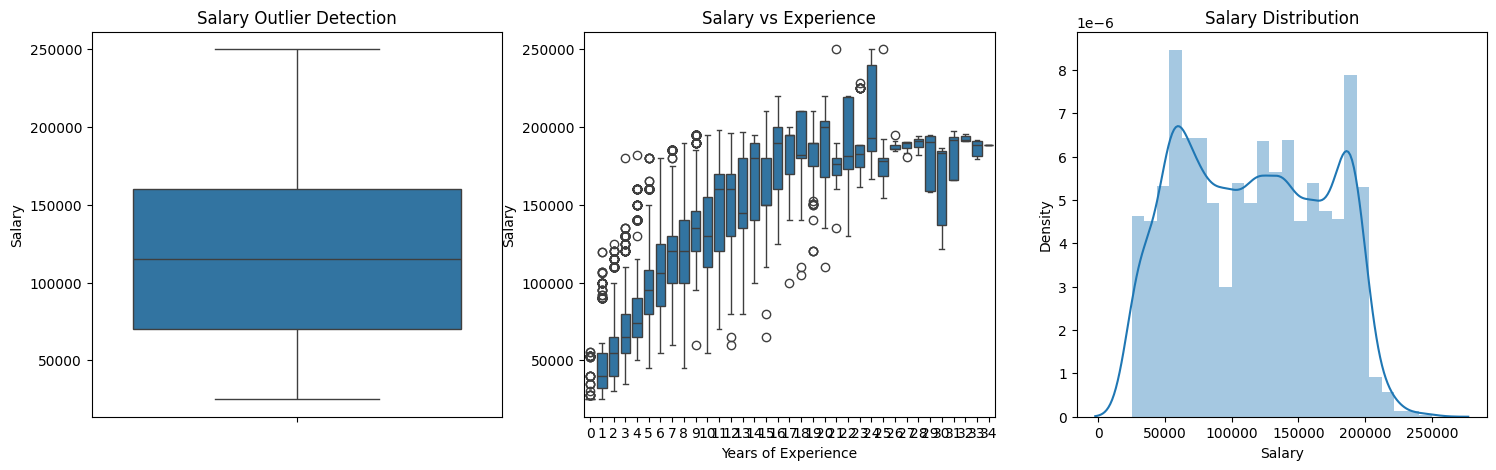

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

sns.boxplot(y=df['Salary'], ax=ax[0])
ax[0].set_title('Salary Outlier Detection')

sns.boxplot(x=df['Years of Experience'], y=df['Salary'], ax=ax[1])
ax[1].set_title('Salary vs Experience')

sns.distplot(df['Salary'],kde =True, ax=ax[2])
ax[2].set_title('Salary Distribution')

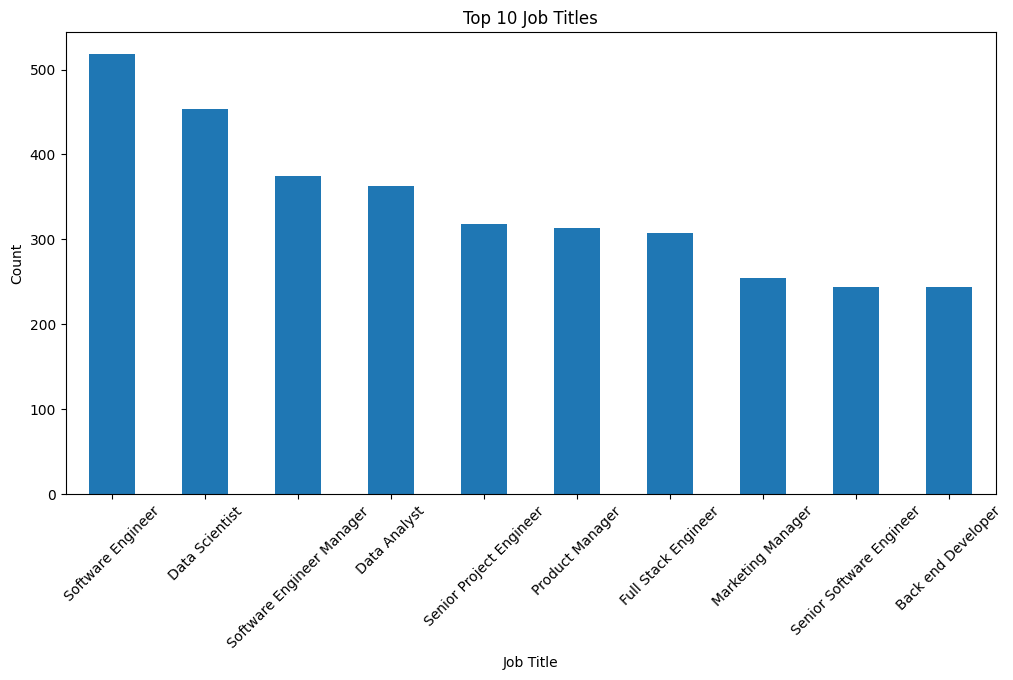

In [ ]:
# === Bar Chart (Top 10 Job Titles) ===
plt.figure(figsize=(12,6))
df["Job Title"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
education_map = {
    'High School': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}

df['Education Level'] = df['Education Level'].map(education_map)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,2,Software Engineer,5,90000.0
1,28,Female,3,Data Analyst,3,65000.0
2,45,Male,4,Senior Manager,15,150000.0
3,36,Female,2,Sales Associate,7,60000.0
4,52,Male,3,Director,20,200000.0


In [ ]:
columns_to_encode = []
if 'Gender' in df.columns:
    columns_to_encode.append('Gender')
if 'Job Title' in df.columns:
    columns_to_encode.append('Job Title')

if columns_to_encode:
    df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
df.head()

,Age,Education Level,Years of Experience,Salary,Gender_Male,Gender_Other,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,Job Title_Business Analyst,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32,2,5,90000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28,3,3,65000.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45,4,15,150000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36,2,7,60000.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52,3,20,200000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print("--- HASIL LINEAR REGRESSION ---")
print(f"MAE (Rata-rata Meleset): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2 Score (Akurasi): {r2_score(y_test, y_pred):.2f}")
print(f"MSE (Rata-rata Kuadrat Meleset): {mse_lr:.2f}")
print(f"RMSE (Akar Rata-rata Kuadrat Meleset): {rmse_lr:.2f}")

--- HASIL LINEAR REGRESSION ---
MAE (Rata-rata Meleset): 15952.12
R2 Score (Akurasi): 0.83
MSE (Rata-rata Kuadrat Meleset): 469025384.99
RMSE (Akar Rata-rata Kuadrat Meleset): 21656.99


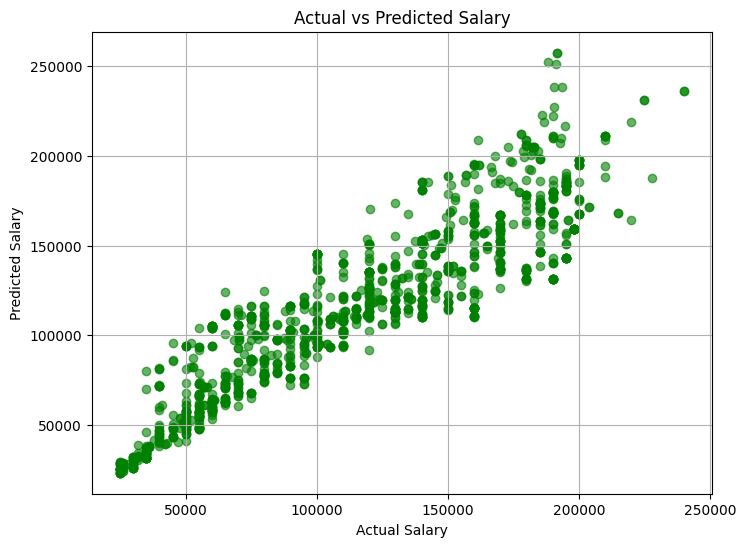

In [ ]:
# SCATTER PLOT PREDIKSI VS AKTUAL
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# model inisialization
rf = RandomForestRegressor(random_state=42)

# train the model
rf.fit(X_train_scaled, y_train)

# make predictions
y_pred_rf = rf.predict(X_test_scaled)

# evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("--- HASIL RANDOM FOREST REGRESSOR ---")
print(f"MAE (Rata-rata Meleset): {mae_rf:.2f}")
print(f"MSE (Rata-rata Kuadrat Meleset): {mse_rf:.2f}")
print(f"RMSE (Akar Rata-rata Kuadrat Meleset): {rmse_rf:.2f}")
print(f"R2 Score (Akurasi): {r2_rf:.2f}")

--- HASIL RANDOM FOREST REGRESSOR ---
MAE (Rata-rata Meleset): 2937.30
MSE (Rata-rata Kuadrat Meleset): 64805598.39
RMSE (Akar Rata-rata Kuadrat Meleset): 8050.19
R2 Score (Akurasi): 0.98


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# model inisialization
gbr = GradientBoostingRegressor(random_state=42)

# train the model
gbr.fit(X_train_scaled, y_train)

# make predictions
y_pred_gbr = gbr.predict(X_test_scaled)

# evaluate the model
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("--- HASIL GRADIENT BOOSTING REGRESSOR ---")
print(f"MAE (Rata-rata Meleset): {mae_gbr:.2f}")
print(f"MSE (Rata-rata Kuadrat Meleset): {mse_gbr:.2f}")
print(f"RMSE (Akar Rata-rata Kuadrat Meleset): {rmse_gbr:.2f}")
print(f"R2 Score (Akurasi): {r2_gbr:.2f}")

--- HASIL GRADIENT BOOSTING REGRESSOR ---
MAE (Rata-rata Meleset): 11734.59
MSE (Rata-rata Kuadrat Meleset): 247386990.14
RMSE (Akar Rata-rata Kuadrat Meleset): 15728.54
R2 Score (Akurasi): 0.91


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print(f"MSE (Rata-rata Kuadrat Meleset) for Linear Regression: {mse_lr:.2f}")
print(f"RMSE (Akar Rata-rata Kuadrat Meleset) for Linear Regression: {rmse_lr:.2f}")

MSE (Rata-rata Kuadrat Meleset) for Linear Regression: 469025384.99
RMSE (Akar Rata-rata Kuadrat Meleset) for Linear Regression: 21656.99


In [ ]:
import pandas as pd

# linear Regression metrics (from previous outputs)
mae_lr = 15048.94
r2_lr = 0.84

# create a df to store the comparison results
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
    'MAE': [mae_lr, mae_rf, mae_gbr],
    'MSE': [mse_lr, mse_rf, mse_gbr],
    'RMSE': [rmse_lr, rmse_rf, rmse_gbr],
    'R2 Score': [r2_lr, r2_rf, r2_gbr]
})

print("--- Model Performance Comparison ---")
print(comparison_df.round(2))

# identify the best performing model based on R2 score
best_model = comparison_df.loc[comparison_df['R2 Score'].idxmax()]
print(f"\nBest performing model based on R2 Score: {best_model['Model']} with R2 Score of {best_model['R2 Score']:.2f}")

--- Model Performance Comparison ---
                         Model       MAE           MSE      RMSE  R2 Score
0            Linear Regression  15048.94  4.690254e+08  21656.99      0.84
1      Random Forest Regressor   2937.30  6.480560e+07   8050.19      0.98
2  Gradient Boosting Regressor  11734.59  2.473870e+08  15728.54      0.91

Best performing model based on R2 Score: Random Forest Regressor with R2 Score of 0.98


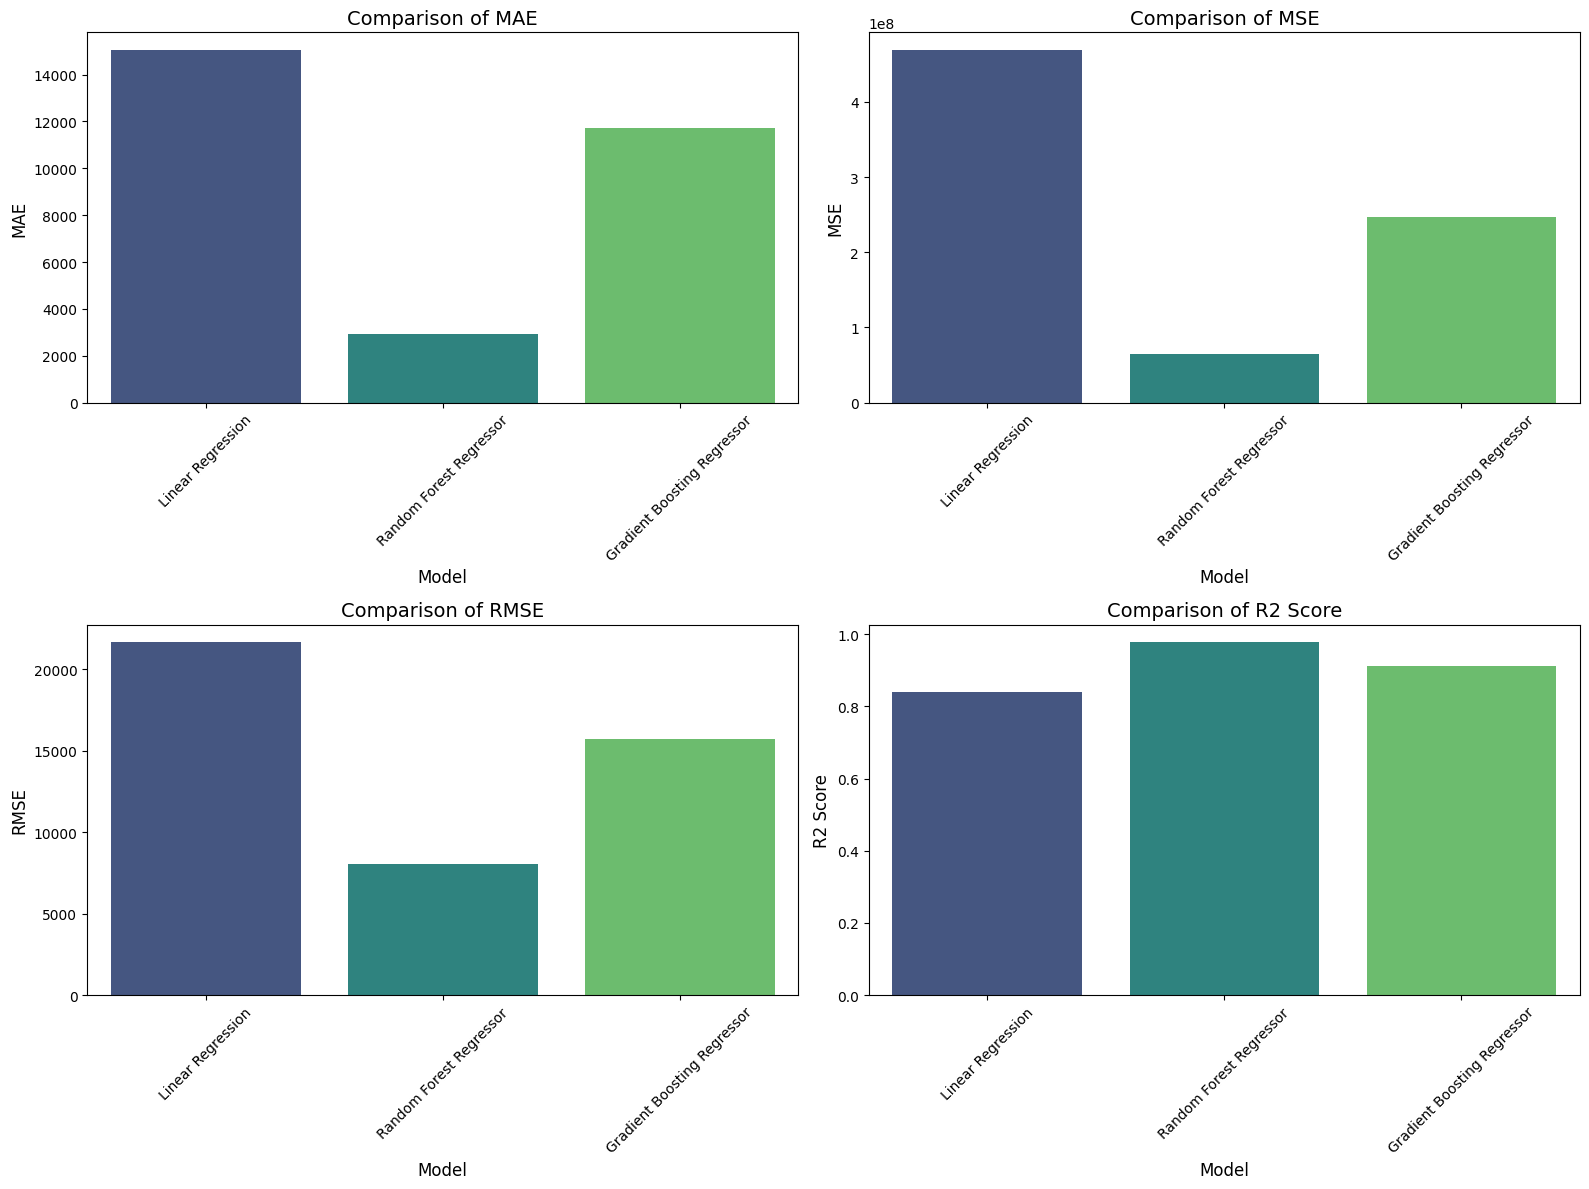

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# prepare data for plotting
metrics = ['MAE', 'MSE', 'RMSE', 'R2 Score']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=comparison_df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Comparison of {metric}', fontsize=14)
    axes[i].set_xlabel('Model', fontsize=12)
    axes[i].set_ylabel(metric, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

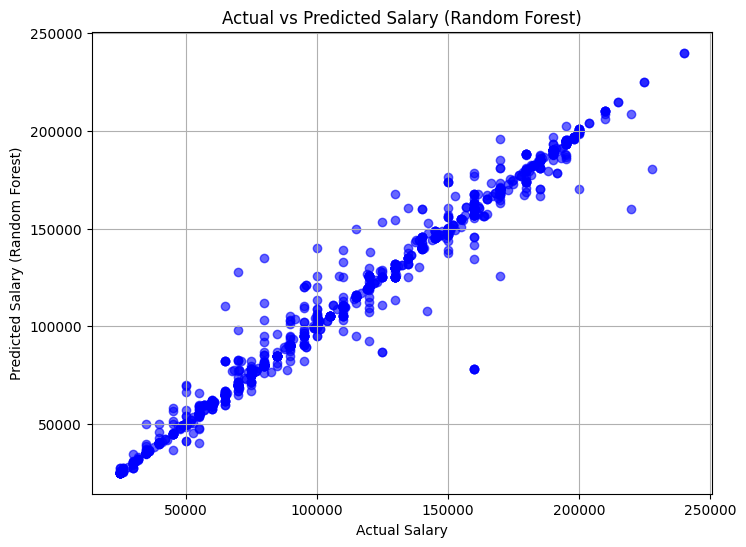

In [ ]:
# scatter plot prediction vs actual for randomforest
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary (Random Forest)")
plt.title("Actual vs Predicted Salary (Random Forest)")
plt.grid(True)
plt.show()

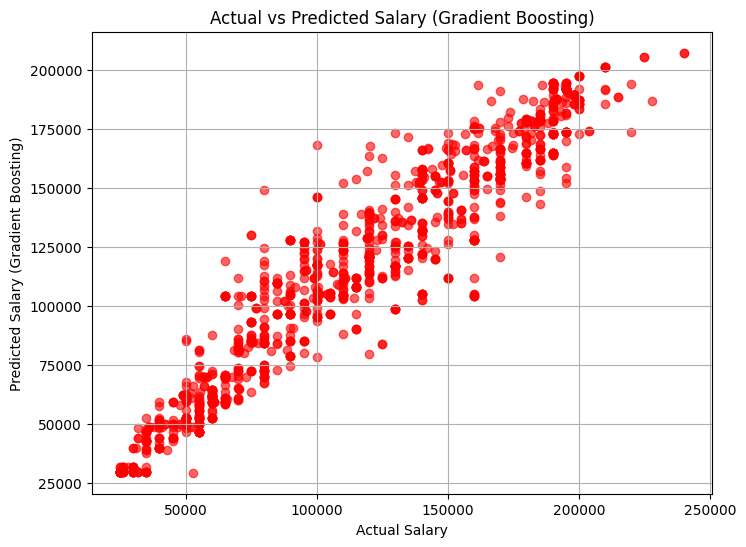

In [ ]:
# scatter plot prediction vs actual for gradientboosting
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_gbr, alpha=0.6, color='red')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary (Gradient Boosting)")
plt.title("Actual vs Predicted Salary (Gradient Boosting)")
plt.grid(True)
plt.show()

--- PERINGKAT FAKTOR PENENTU GAJI ---
                           Fitur  Importance
2            Years of Experience    0.755160
0                            Age    0.045084
22        Job Title_Data Analyst    0.033189
24      Job Title_Data Scientist    0.032799
179  Job Title_Software Engineer    0.029724


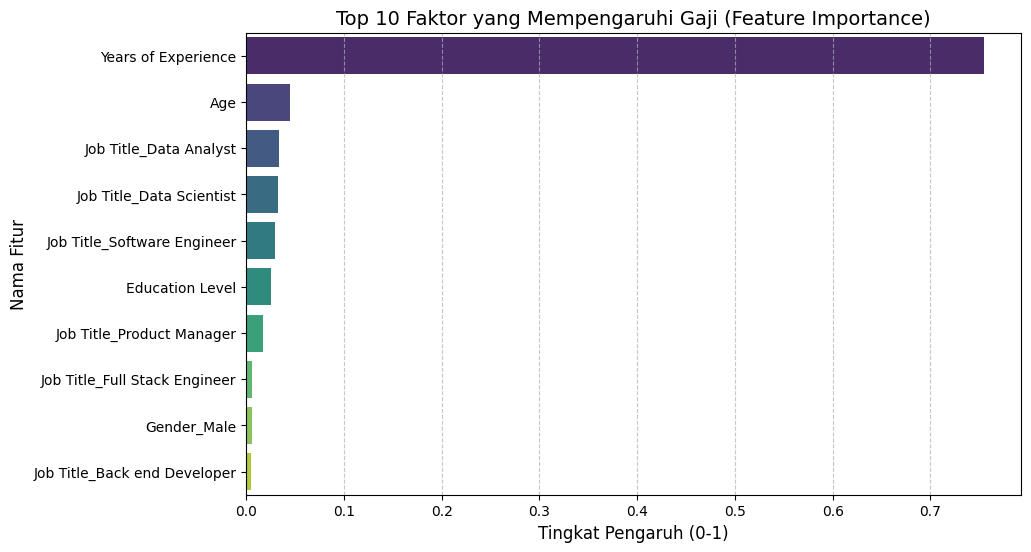

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


importances = rf.feature_importances_
feature_names = X.columns

df_importance = pd.DataFrame({
    'Fitur': feature_names,
    'Importance': importances
})

df_importance = df_importance.sort_values(by='Importance', ascending=False)

print("--- PERINGKAT FAKTOR PENENTU GAJI ---")
print(df_importance.head())

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Fitur', data=df_importance.head(10), palette='viridis')

plt.title('Top 10 Faktor yang Mempengaruhi Gaji (Feature Importance)', fontsize=14)
plt.xlabel('Tingkat Pengaruh (0-1)', fontsize=12)
plt.ylabel('Nama Fitur', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()